# Step 1: Understanding Weak Learners
Let's create a simple dataset and explore how basic models perform.


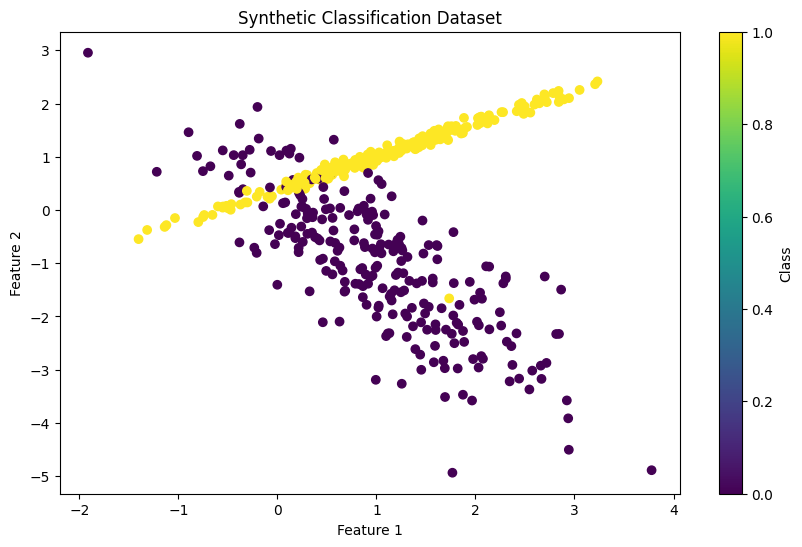

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Synthetic Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

# Step 2: Train a Weak Learner
Create and evaluate a simple decision tree with limited depth.


In [2]:
# Initialize and train weak learner with shallow depth
weak_learner = DecisionTreeClassifier(max_depth=1, random_state=42)
weak_learner.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=42)


Weak Learner Performance:
Accuracy: 0.880


<Figure size 800x600 with 0 Axes>

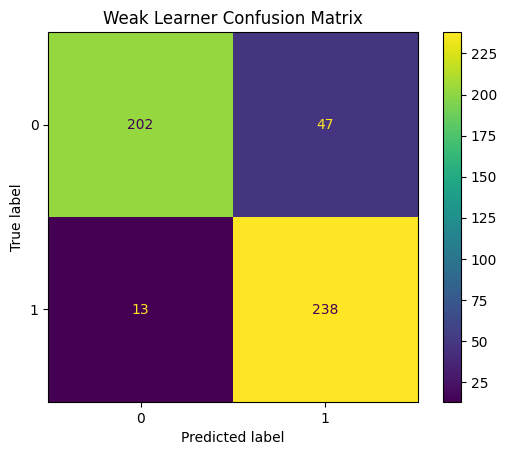

In [3]:
# Evaluate weak learner
y_pred = weak_learner.predict(X)
weak_accuracy = accuracy_score(y, y_pred)
print(f"\nWeak Learner Performance:")
print(f"Accuracy: {weak_accuracy:.3f}")

# Visualize weak learner predictions
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.title('Weak Learner Confusion Matrix')
plt.show()

# Step 3: Introducing Boosting
Demonstrate how boosting works with visual aids.

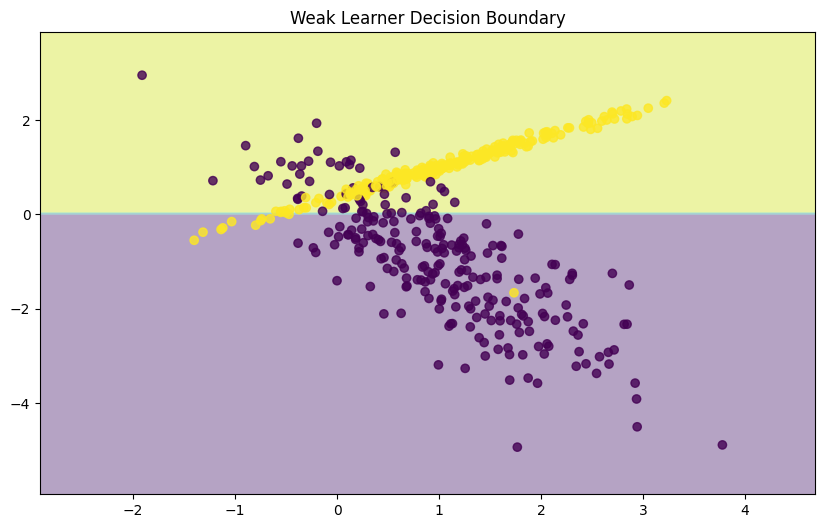

In [4]:
# #added during screencast
def plot_decision_boundary(model, X, y, title):
    """Helper function to plot decision boundaries"""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.show()

# Visualize weak learner decision boundary
plot_decision_boundary(weak_learner, X, y, "Weak Learner Decision Boundary")

# Step 4: Implementing AdaBoost
Apply AdaBoost to improve our weak learner.


AdaBoost Performance:
Accuracy: 0.876


<Figure size 800x600 with 0 Axes>

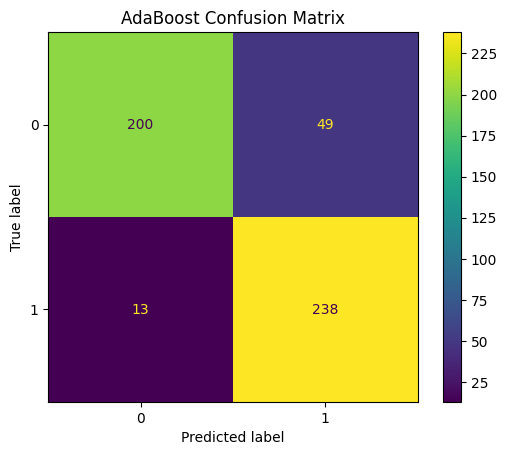

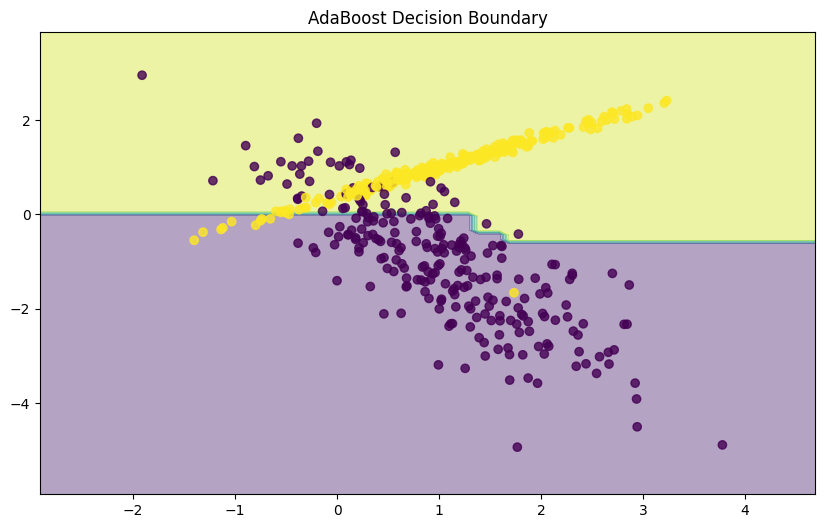

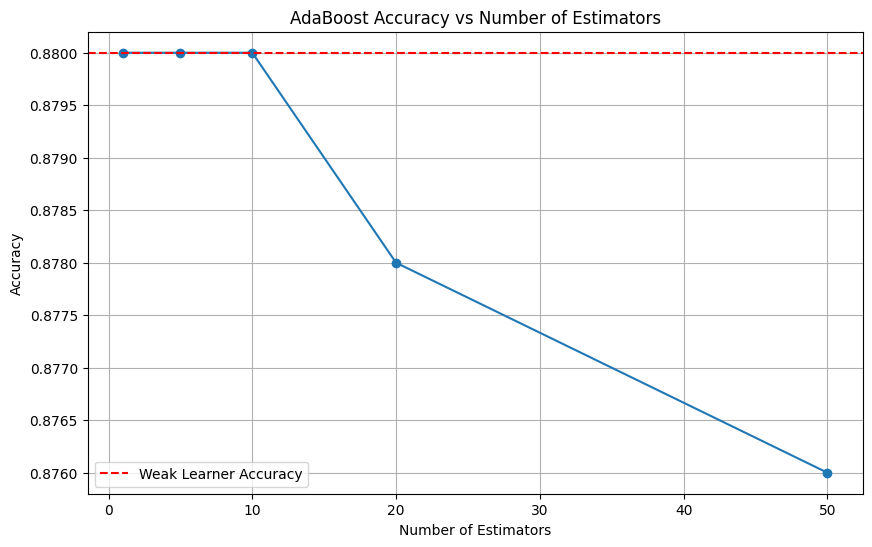

In [7]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train AdaBoost
ada_boost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
ada_boost.fit(X, y)

# Evaluate AdaBoost
y_pred_ada = ada_boost.predict(X)
ada_accuracy = accuracy_score(y, y_pred_ada)
print(f"\nAdaBoost Performance:")
print(f"Accuracy: {ada_accuracy:.3f}")

# Visualize AdaBoost predictions
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y, y_pred_ada)
plt.title('AdaBoost Confusion Matrix')
plt.show()

# #added during screencast
# Visualize AdaBoost decision boundary
plot_decision_boundary(ada_boost, X, y, "AdaBoost Decision Boundary")

# #added during screencast
# Compare accuracy progression
n_estimators_range = [1, 5, 10, 20, 50]
accuracies = []

plt.figure(figsize=(10, 6))
for n_est in n_estimators_range:
    boost = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n_est,
        random_state=42
    )
    boost.fit(X, y)
    accuracies.append(accuracy_score(y, boost.predict(X)))

plt.plot(n_estimators_range, accuracies, marker='o')
plt.axhline(y=weak_accuracy, color='r', linestyle='--', label='Weak Learner Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()